# Linear Regression With Python

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_3924e81fa6814df3843a85d1b6772127 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AdJYLFVYAY-LRBftUpWR2rkY-OlC1SZ70LsHrGUrCl7h',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3924e81fa6814df3843a85d1b6772127.get_object(Bucket='machinelearningnewphase-donotdelete-pr-d7jxbld2uwg8nm',Key='ex1data1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,House,Price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [12]:
df = df_data_1[['House','Price']]
df.head()

,House,Price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


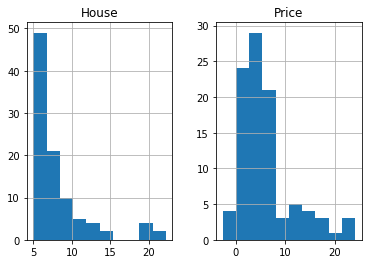

In [13]:
df.hist()
plt.show()

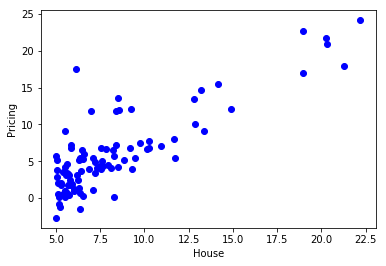

In [14]:
plt.scatter(df.House,df.Price,color="blue")
plt.xlabel("House")
plt.ylabel("Pricing")
plt.show()

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

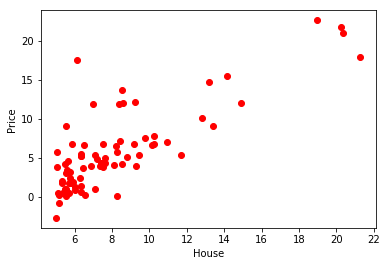

In [19]:
plt.scatter(train.House,train.Price,color="red")
plt.xlabel("House")
plt.ylabel("Price")
plt.show()

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['House']])
y = np.asanyarray(train[['Price']])
regr.fit(x,y)
print("Coefficient of regr - ",regr.coef_)
print("Intercept",regr.intercept_)

Coefficient of regr -  [[1.18871913]]
Intercept [-3.85774328]


Text(0, 0.5, 'Price')

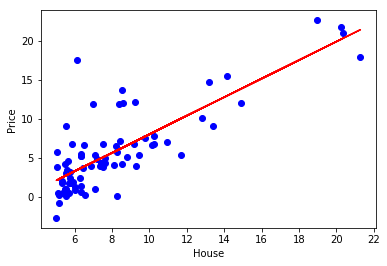

In [21]:
plt.scatter(train.House,train.Price,color="Blue")
plt.plot(x,regr.coef_[0][0]*x+regr.intercept_[0],'-r')
plt.xlabel("House")
plt.ylabel("Price")

In [25]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['House']])
test_y = np.asanyarray(test[['Price']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y))) 
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2)) 
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 1.92
Residual sum of squares (MSE): 5.30
R2-score: 0.84
